In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.linalg import eigh_tridiagonal

# Finite Difference Method on the 1-D Schrodinger Equation

## This is the Schrodinger Equation in 1-D
#### $-\frac{\hbar^2}{2m}\frac{d^2}{dx^2}\psi(x) + V(x)\psi(x) = E \psi(x)$

#### Change of variables: y = x/L and set m and $\hbar$ equal to 1.

#### $-\frac{1}{2}\frac{d^2}{dx^2}\psi(y) + L^2V(y)\psi(y) = L^2E\psi(y)$

## Finite Difference Method (FDM)

#### $\frac{d^2}{dx^2}\psi_i = \frac{\psi_{i+1} - 2\psi_{i} + \psi_{i-1}}{\Delta y^2}$

## Now we can plug in the FDM formula into the 1-D Schrodinger Eq

#### $-\frac{1}{2}(\frac{\psi_{i+1} - 2\psi_{i} + \psi_{i-1}}{\Delta y^2}) + L^2V(y)\psi_i = L^2E\psi_i$

###  $\downarrow$

#### $- \frac{1}{2\Delta^2}\psi_{i-1} + (\frac{1}{\Delta y^2} + L^2V(y_i))\psi_i - \frac{1}{2\Delta^2}\psi_{i+1} = L^2E\psi_i$

## Tridiagonal Matrix
\begin{bmatrix}
a_1 & b_1 & 0 & \cdots & \cdots & 0 \\
c_1 & a_2 & b_2 & \ddots &  & \vdots \\
0 & c_2 & a_3 & b_3 & \ddots & \vdots \\
\vdots & \ddots & \ddots & \ddots & \ddots & 0 \\
\vdots &  & \ddots & c_{n-2} & a_{n-1} & b_{n-1} \\
0 & \cdots & \cdots & 0 & c_{n-1} & a_n
\end{bmatrix}

#### Establishing the following boundary conditions:

#### 1) $\psi_0 = 0$
#### 2) $\psi_N = 0$

#### We can then make a tridiagonal matrix that is an egienvalue problem. The eigenvalues are going to be the energies (multiplied by $L^2$) and their correspoding eigenvectors are the wavefunction representing that energy state.

## Frist we solve make this matrix for a potential we know the solutions to analytically; the harmonic oscillator

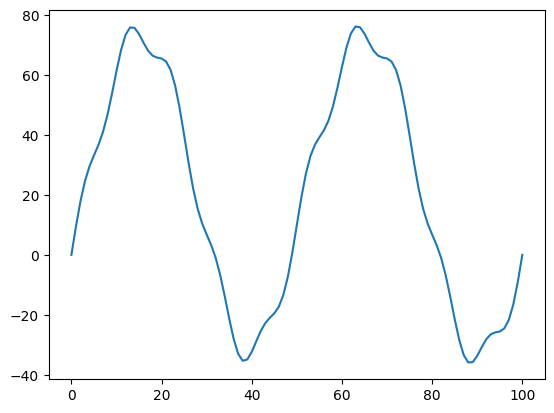

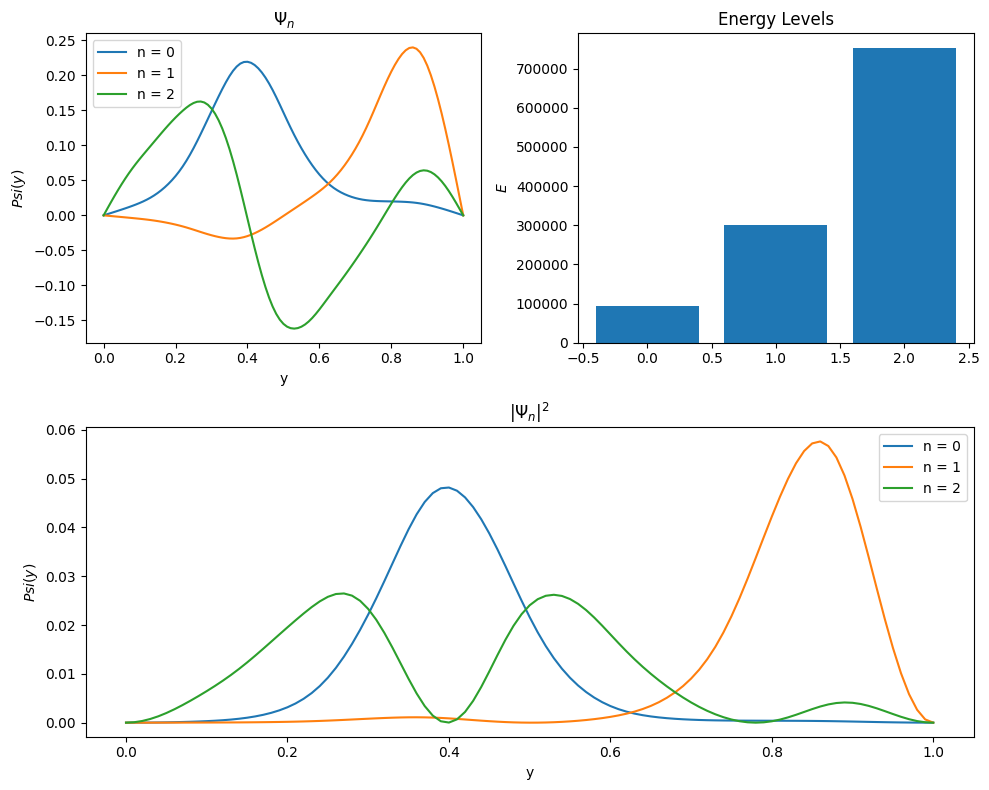

In [4]:
def n_Schrodinger(V,y,dy,state):
    d = 1/dy**2 + V(y)[1:-1]
    e = -1/(2*dy**2) * np.ones(len(d)-1)
    w, v = eigh_tridiagonal(d,e)
    fig = plt.figure(figsize=(10, 8))
    waves = np.zeros((state+1, len(v)+2))
    waves_squared = np.zeros((state+1, len(v)+2))
    
    # Wavefunctions
    ax1 = fig.add_subplot(2,2,1)
    ax1.set_title("$\\Psi_n$");ax1.set_xlabel("y");ax1.set_ylabel("$Psi(y)$")
    for i in range(state+1):
        lab = "n = "+ str(i)
        waves[i] = np.pad(v.T[i], (1,1), mode ='constant', constant_values=0)
        ax1.plot(y,waves[i], label=lab)
    ax1.legend()
    
    # Energy Levels
    ax2 = fig.add_subplot(2, 2, 2)
    ax2.bar(np.arange(0,state+1,1), w[0:state+1]*N**2)
    ax2.set_title("Energy Levels");ax2.set_ylabel('$E$')
    
    #Normalized square wavefunctions
    ax3 = fig.add_subplot(2, 1, 2)
    ax3.set_title("$|\\Psi_n|^2$");ax3.set_xlabel("y");ax3.set_ylabel("$Psi(y)$") 
    for i in range(state+1):
        lab = "n = "+ str(i)
        
        wave = np.pad(v.T[i], (1,1), mode ='constant', constant_values=0)
        ax3.plot(y,abs(wave)**2, label=lab)
    ax3.legend()
    
    plt.tight_layout()
    plt.show()
    return w, waves
    
def random_V(y):
    return 1000*np.exp(-(y-0.7)**2 / (2*0.05**2))

def harmonic_V(y):
    return 1000*(y-1/2)**2


def crazy_V(y):
    return (50 * np.sin(2 * np.pi * y * 2) +
            40 * (np.sin(2 * np.pi * y) ** 2) +
            10 * np.exp(-((y - 0.5) ** 2) / 0.005) +
            5 * np.sin(2 * np.pi * y * 10))

N = 100
dy = 1/N
y = np.linspace(0,1, N+1)
state = 2
plt.plot(crazy_V(y))
#w,wave = n_Schrodinger(harmonic_V,y,dy,state)
w,waves = n_Schrodinger(crazy_V,y,dy,state)

## Now that the stationary states are solved, we can now approximate how these states change with time.

### $\Psi(x,t) = \frac{1}{\sqrt{3}}(\phi_0(t)\psi_0(x) + \phi_1(t)\psi_1(x) + \phi_2(t)\psi_2(x))$

In [6]:
time = 20
phi = np.zeros((len(waves),time+1), dtype=np.complex_)
for i in range(len(waves)):
    for j in range(time+1):
        phi[i][j] = np.exp(-1j*w[i]*j)


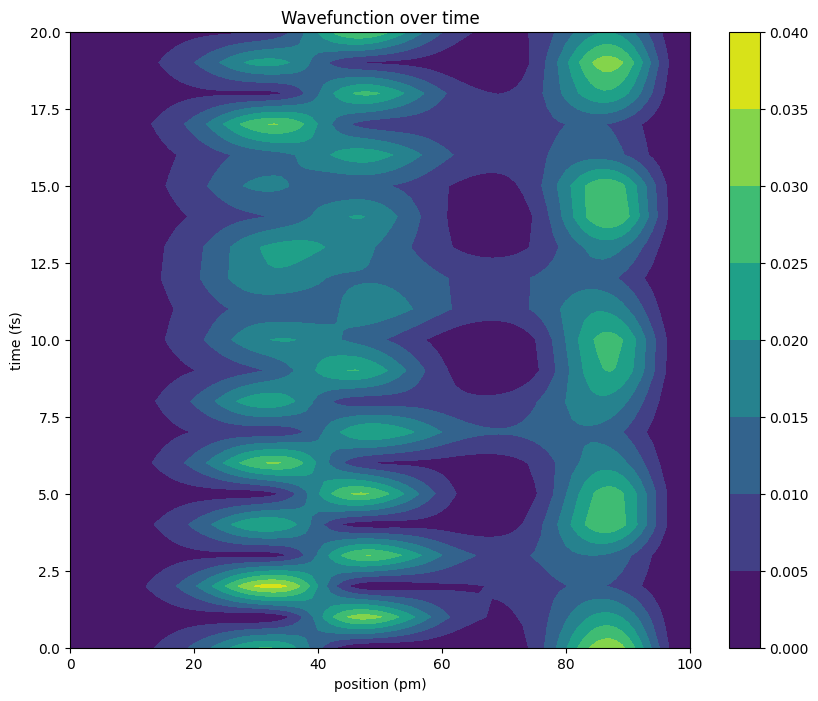

In [7]:
def t_evo_schro(time,w,waves,N):
    phi = np.zeros((len(waves),time+1), dtype=np.complex_)
    for i in range(len(waves)):
        for j in range(time+1):
            phi[i][j] = np.exp(-1j*w[i]*j)

    wavefunc = np.zeros((time+1,len(waves[0])), dtype=np.complex_ )
    for i in range(time+1):
        for k in range(len(waves[0])):
            wavefunc[i][k] = (1/np.sqrt(len(waves)))*(waves[0][k]*phi[0][i] + waves[1][k]*phi[1][i] + waves[2][k]*phi[2][i])
    
    x = np.linspace(0, N, N+1)
    y = np.linspace(0, time, time+1)
    X, Y = np.meshgrid(x, y)

    fig, ax = plt.subplots(figsize=(10, 8))
    Z = abs(wavefunc)**2 
    contour = ax.contourf(X, Y, Z, cmap='viridis')
    fig.colorbar(contour, ax=ax)
    ax.set_title("Wavefunction over time")
    ax.set_xlabel("position (pm)")
    ax.set_ylabel("time (fs)")
    plt.show()
    #print(np.trapz(abs(wavefunc[2])**2))

    plt.show()
    return
N=100
t_evo_schro(time,w,waves,N)

## We can add coefficients and see how they change the wave function through time with pertubation theory.

### $\Psi(x,t) = \frac{1}{\sqrt{c_0(t)^2 + c_1(t)^2 + c_2(t)^2}}(c_0(t)\phi_0(t)\psi_0(x) + c_1(t)\phi_1(t)\psi_1(x) + c_2(t)\phi_2(t)\psi_2(x))$

### $\frac{dc_n}{dt} = \frac{1}{i\hbar} \sum_{m} V'_{nm} e^{i \omega_{nm} t} c_m(t)$

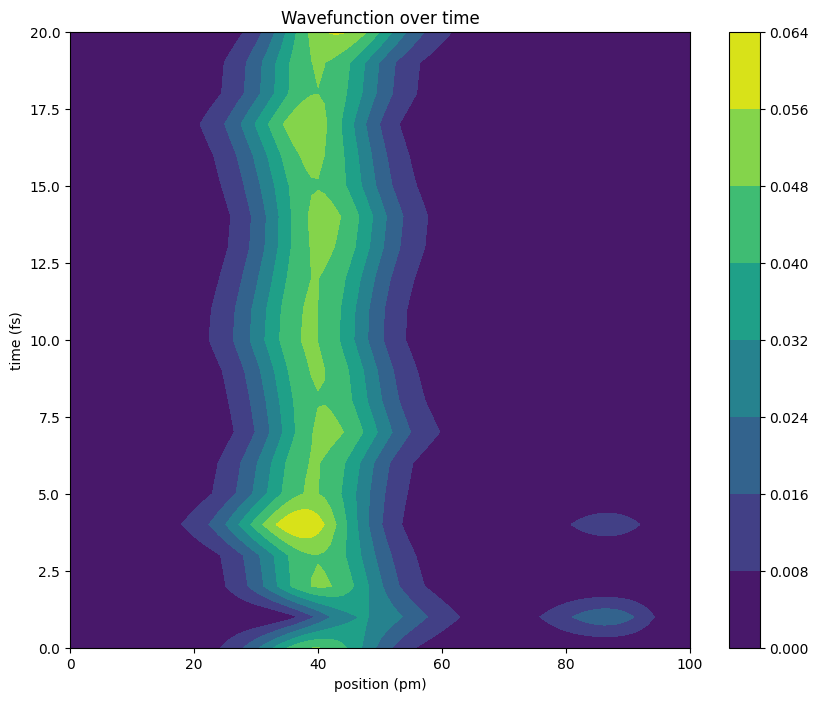

In [26]:
def t_V(state1,state2,t):
    return np.trapz(state1*np.tan(t)*state2)
c = np.zeros((len(waves),time+1), dtype=np.complex_)
# Assume we start from ground state (n=0)
c[0][0] = 1
for i in range(0,time):
    for j in range(len(waves)):
        dc = -1j*(c[0][i]*t_V(phi[j],phi[0],i)*np.exp(1j*(w[j]*N**2-w[0]*N**2))) + c[1][i]*t_V(phi[j],phi[1],i)*np.exp(1j*(w[j]*N**2-w[1]*N**2))+ c[2][i]*t_V(phi[j],phi[2],i)*np.exp(1j*(w[j]*N**2-w[2]*N**2))
        c[j][i+1] = c[0][i]+dc
def t_evo_schro_perturbed(time,w,waves,N):
    phi = np.zeros((len(waves),time+1), dtype=np.complex_)
    for i in range(len(waves)):
        for j in range(time+1):
            phi[i][j] = np.exp(-1j*w[i]*j)

    wavefunc = np.zeros((time+1,len(waves[0])), dtype=np.complex_ )
    for i in range(time+1):
        for k in range(len(waves[0])):
            nFactor = 1/np.sqrt((c[0][i]**2)+(c[1][i]**2)+(c[2][i]**2))
            wavefunc[i][k] = nFactor*(c[0][i]*waves[0][k]*phi[0][i] + c[1][i]*waves[1][k]*phi[1][i] + c[2][i]*waves[2][k]*phi[2][i])
    
    x = np.linspace(0, N, N+1)
    y = np.linspace(0, time, time+1)
    X, Y = np.meshgrid(x, y)

    fig, ax = plt.subplots(figsize=(10, 8))
    Z = abs(wavefunc)**2 
    contour = ax.contourf(X, Y, Z, cmap='viridis')
    fig.colorbar(contour, ax=ax)
    ax.set_title("Wavefunction over time")
    ax.set_xlabel("position (pm)")
    ax.set_ylabel("time (fs)")
    plt.show()
    #print(np.trapz(abs(wavefunc[8])**2))

    plt.show()
    return

t_evo_schro_perturbed(time,w,waves,N)